<a href="https://colab.research.google.com/github/sanyhmahadi/MentalSituationInCovid19RNN/blob/main/MentalSituationInCovid19RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Research/NLP/covidSentimentData.xlsx")

In [ ]:
df.head(5)

,TypeOfOpinion,Status
0,"স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এ...",yes
1,"স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এ...",yes
2,"স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এ...",No
3,পড়ালেখা বিঘ্নিত হয়েছে,yes
4,"স্বাস্থ সচেতন হয়েছি, পড়ালেখা বিঘ্নিত হয়েছে",yes


In [ ]:
df.shape

(443, 2)

In [ ]:
df['TypeOfOpinion'].value_counts()

স্বাস্থ সচেতন হয়েছি, পড়ালেখা বিঘ্নিত হয়েছে                                                                                                                                                          66
স্বাস্থ সচেতন হয়েছি                                                                                                                                                                                 57
স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এক্টিভেটিস করার যথেষ্ট সময় পেয়েছি, পড়ালেখা বিঘ্নিত হয়েছে                                                                                               46
পড়ালেখা বিঘ্নিত হয়েছে                                                                                                                                                                               42
স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এক্টিভেটিস করার যথেষ্ট সময় পেয়েছি                                                                                                                      25
এই সম

In [ ]:
df.isnull().sum()

TypeOfOpinion    0
Status           0
dtype: int64

In [ ]:
len(df[df.Status=='yes'])
len(df[df.Status=='No'])

206

In [ ]:
df.Status = df.Status.replace({'yes': 1, 'No': 0})

In [ ]:
df['Status']

0      1
1      1
2      0
3      1
4      1
      ..
438    1
439    1
440    1
441    1
442    1
Name: Status, Length: 443, dtype: int64

In [ ]:
for i in range(5):
  print("TypeOfOpinion:",i+1)
  print("Details:",df.TypeOfOpinion[i])

TypeOfOpinion: 1
Details: স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এক্টিভেটিস করার যথেষ্ট সময় পেয়েছি, কভিড-১৯ এ আক্রান্ত হয়েছি, পড়ালেখা বিঘ্নিত হয়েছে
TypeOfOpinion: 2
Details: স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এক্টিভেটিস করার যথেষ্ট সময় পেয়েছি
TypeOfOpinion: 3
Details: স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এক্টিভেটিস করার যথেষ্ট সময় পেয়েছি, পড়ালেখা বিঘ্নিত হয়েছে
TypeOfOpinion: 4
Details: পড়ালেখা বিঘ্নিত হয়েছে
TypeOfOpinion: 5
Details: স্বাস্থ সচেতন হয়েছি, পড়ালেখা বিঘ্নিত হয়েছে


In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

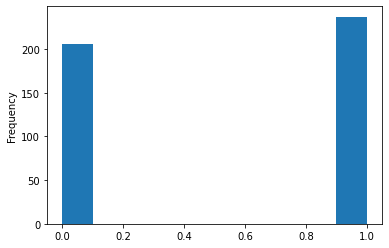

In [ ]:
df['Status'].plot(kind='hist')

In [ ]:
df['length'] = df['TypeOfOpinion'].str.split().apply(len)
df.head(10)

,TypeOfOpinion,Status,length
0,"স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এ...",1,20
1,"স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এ...",1,13
2,"স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এ...",0,16
3,পড়ালেখা বিঘ্নিত হয়েছে,1,3
4,"স্বাস্থ সচেতন হয়েছি, পড়ালেখা বিঘ্নিত হয়েছে",1,6
5,স্বাস্থ সচেতন হয়েছি,0,3
6,"স্বাস্থ সচেতন হয়েছি, পড়ালেখা বিঘ্নিত হয়েছে",0,6
7,"স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এ...",1,13
8,স্বাস্থ সচেতন হয়েছি,0,3
9,স্বাস্থ সচেতন হয়েছি,0,3


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c0156dfd0>,
      dtype=object)

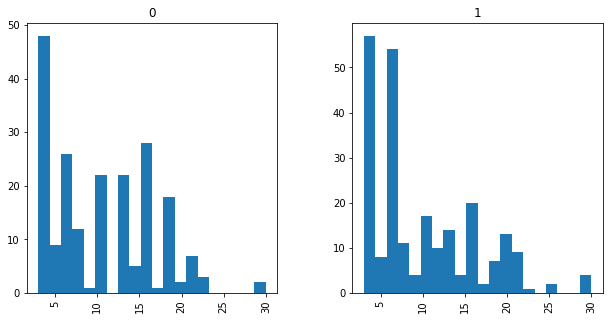

In [ ]:
df.hist(column='length', by = 'Status',bins = 20, figsize=(10,5))

In [ ]:
df.length.describe()

count    443.000000
mean      10.112867
std        6.333556
min        3.000000
25%        5.000000
50%        8.000000
75%       16.000000
max       30.000000
Name: length, dtype: float64

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers , activations , models , preprocessing , utils

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import itertools
import os
import numpy as np # linear algebra
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
import keras.utils as ku
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout
from keras import optimizers
from numpy.random import seed

seed(1)
from tensorflow import random
random.set_seed(2)


layers = keras.layers
models = keras.models


In [ ]:
df['Status'].value_counts()

1    237
0    206
Name: Status, dtype: int64

In [ ]:
train_size = int(len(df) * .75)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))


Train size: 332
Test size: 111


In [ ]:
def train_test_split(df, train_size):
    train = df[:train_size]
    test = df[train_size:]
    return train, test

In [ ]:
train_text, test_text = train_test_split(df['TypeOfOpinion'], train_size,)
train_cat, test_cat = train_test_split(df['Status'], train_size,)

In [ ]:
max_words = 800
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, 
                                              char_level=False)

In [ ]:
tokenize.fit_on_texts(train_text)
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [ ]:
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (332, 800)
x_test shape: (111, 800)
y_train shape: (332, 2)
y_test shape: (111, 2)


In [ ]:
batch_size = 52
epochs = 15
adam=keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256,kernel_initializer='uniform',input_shape=(max_words,)))
model.add(layers.Dropout(0.2))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Dropout(0.2))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
_________________________________________________________________
dropout_1 (Dropout)          (None, 2)                 0         
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 205,570
Trainable params: 205,570
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.15)

Epoch 1/15
6/6 - 1s - loss: 0.6891 - accuracy: 0.5355 - val_loss: 0.6350 - val_accuracy: 0.7200
Epoch 2/15
6/6 - 0s - loss: 0.6642 - accuracy: 0.6135 - val_loss: 0.5940 - val_accuracy: 0.8200
Epoch 3/15
6/6 - 0s - loss: 0.6526 - accuracy: 0.6560 - val_loss: 0.5605 - val_accuracy: 0.8200
Epoch 4/15
6/6 - 0s - loss: 0.6394 - accuracy: 0.6950 - val_loss: 0.5268 - val_accuracy: 0.8600
Epoch 5/15
6/6 - 0s - loss: 0.6283 - accuracy: 0.6844 - val_loss: 0.4992 - val_accuracy: 0.8600
Epoch 6/15
6/6 - 0s - loss: 0.6151 - accuracy: 0.7021 - val_loss: 0.4729 - val_accuracy: 0.8600
Epoch 7/15
6/6 - 0s - loss: 0.5922 - accuracy: 0.7021 - val_loss: 0.4515 - val_accuracy: 0.9000
Epoch 8/15
6/6 - 0s - loss: 0.5944 - accuracy: 0.7021 - val_loss: 0.4303 - val_accuracy: 0.9000
Epoch 9/15
6/6 - 0s - loss: 0.5869 - accuracy: 0.7021 - val_loss: 0.4188 - val_accuracy: 0.9000
Epoch 10/15
6/6 - 0s - loss: 0.5827 - accuracy: 0.6950 - val_loss: 0.4061 - val_accuracy: 0.9000
Epoch 11/15
6/6 - 0s - loss: 0.5873 - a

In [ ]:
score = model.evaluate(x_train, y_train,
                       batch_size=batch_size, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])


7/7 - 0s - loss: 0.5403 - accuracy: 0.7500
Train loss: 0.5403184294700623
Train accuracy: 0.75


In [ ]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=2)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

3/3 - 0s - loss: 0.5508 - accuracy: 0.7117
Test loss: 0.5507960915565491
Test accuracy: 0.7117117047309875


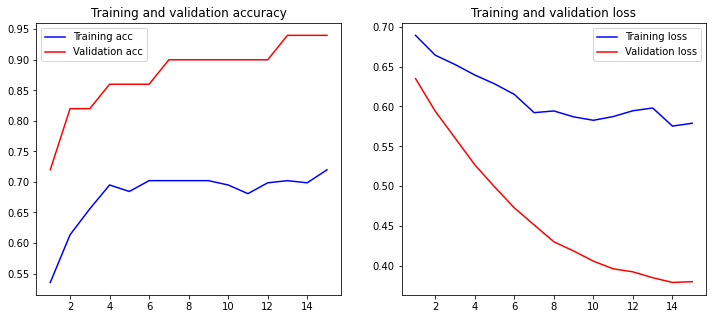

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)
images_dir = '/content/drive/MyDrive/Research'
plt.savefig(f"{images_dir}/abc.jpg")


In [ ]:
text_labels = encoder.classes_ 
for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:50], "...")
    kj = str(test_cat.iloc[i])
    mj = str(predicted_label)
    print('Actual Status:' + kj)
    print("Predicted Status: " + mj + "\n")  

পরিবারের সাথে দূরত্ব সৃষ্টি হয়েছে ...
Actual Status:0
Predicted Status: 1

পরিবারের সাথে দূরত্ব সৃষ্টি হয়েছে ...
Actual Status:1
Predicted Status: 1

পরিবারের সাথে দূরত্ব সৃষ্টি হয়েছে ...
Actual Status:1
Predicted Status: 1

স্বাস্থ সচেতন হয়েছি, কভিড-১৯ এ আক্রান্ত হয়েছি ...
Actual Status:0
Predicted Status: 1

স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এক্টি ...
Actual Status:0
Predicted Status: 0

স্বাস্থ সচেতন হয়েছি, কভিড-১৯ এ আক্রান্ত হয়েছি ...
Actual Status:0
Predicted Status: 1

কভিড-১৯ এ আক্রান্ত হয়েছি, পরিবারের সাথে দূরত্ব সৃষ ...
Actual Status:1
Predicted Status: 1

স্বাস্থ সচেতন হয়েছি, কভিড-১৯ এ আক্রান্ত হয়েছি, পড়া ...
Actual Status:1
Predicted Status: 1

স্বাস্থ সচেতন হয়েছি ...
Actual Status:0
Predicted Status: 0

অনলাইন বিজনেস এ লাভবান হয়েছি, পড়ালেখা বিঘ্নিত হয়েছ ...
Actual Status:0
Predicted Status: 1

